In [56]:
pwd

'C:\\Users\\10\\Desktop\\python'

In [57]:
import pandas as pd # 데이터분석을 위한 라이브러리
import numpy as np # 숫자계산, 행렬을 위한 라이브러리

In [58]:
patient_info = pd.read_csv('./PatientInfo.csv')

In [59]:
print(patient_info)

      patient_id     sex  age     country province         city  \
0     1000000001    male  50s       Korea    Seoul   Gangseo-gu   
1     1000000002    male  30s       Korea    Seoul  Jungnang-gu   
2     1000000003    male  50s       Korea    Seoul    Jongno-gu   
3     1000000004    male  20s       Korea    Seoul      Mapo-gu   
4     1000000005  female  20s       Korea    Seoul  Seongbuk-gu   
...          ...     ...  ...         ...      ...          ...   
5160  7000000015  female  30s       Korea  Jeju-do      Jeju-do   
5161  7000000016     NaN  NaN       Korea  Jeju-do      Jeju-do   
5162  7000000017     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   
5163  7000000018     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   
5164  7000000019     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   

            infection_case infected_by contact_number symptom_onset_date  \
0          overseas inflow         NaN             75         2020-01-22   
1          overseas inflow         NaN     

In [60]:
type(patient_info)

pandas.core.frame.DataFrame

In [61]:
patient_ac = patient_info[['age', 'province']] # 칼럼 2개이상 추출은 다시한번 []로 묶어주기
#patient_ac = patient_info.iloc[:,[2,5]]
print(patient_ac)

      age province
0     50s    Seoul
1     30s    Seoul
2     50s    Seoul
3     20s    Seoul
4     20s    Seoul
...   ...      ...
5160  30s  Jeju-do
5161  NaN  Jeju-do
5162  NaN  Jeju-do
5163  NaN  Jeju-do
5164  NaN  Jeju-do

[5165 rows x 2 columns]


In [62]:
# Nan 지우기
patient_ac_clear = patient_ac.dropna(axis=0) 

In [63]:
patient_ac_clear

,age,province
0,50s,Seoul
1,30s,Seoul
2,50s,Seoul
3,20s,Seoul
4,20s,Seoul
...,...,...
5156,30s,Jeju-do
5157,20s,Jeju-do
5158,10s,Jeju-do
5159,30s,Jeju-do


# 1차 그래프

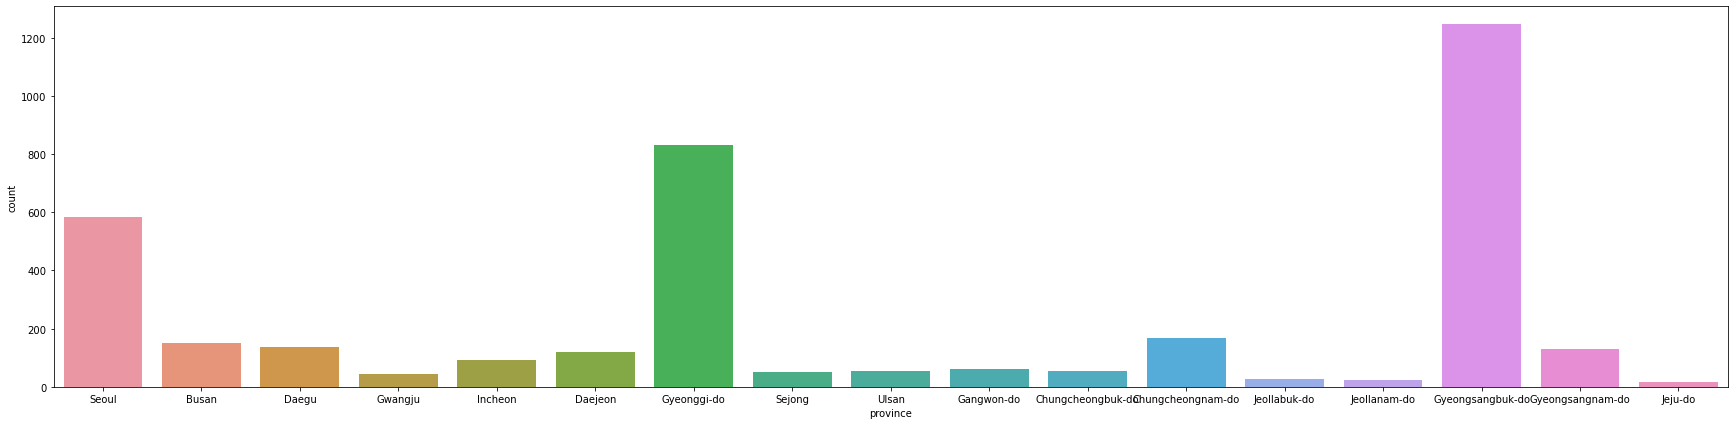

In [27]:
plt.figure(figsize=(30, 7))                                # 그래프 크기
Province_p = sns.countplot('province', data=patient_ac_clear)
plt.show()

In [64]:
a = patient_ac_clear.replace('30s','20s') # 20대 30대 = 20대로 통일
b = a.replace('50s','40s') # 40,50 = 40
c = b.replace('70s','60s') # 60,70 = 60
d = c.replace(['80s','90s'],'100s') # 80,90,100 = 100
# 남아있는 세대 : 10,20,40,60,100

e = d.replace('Gyeonggi-do','Gyeonggi')# 지역명 변경, 20s 30s...-> 1,2,3,4,5 변경
e = e.replace('Gangwon-do','Gangwon')
e = e.replace('Gangwon-do','Gangwon')
e = e.replace('Chungcheongbuk-do','CB')
e = e.replace('Chungcheongnam-do','CN')
e = e.replace('Jeollabuk-do','JB')
e = e.replace('Jeollanam-do','JN')
e = e.replace('Gyeongsangnam-do','GN')
e = e.replace('Gyeongsangbuk-do','GB')
e = e.replace('Jeju-do','Jeju')
e = e.replace('20s',int(2))
e = e.replace('10s',int(1))
e = e.replace('40s',int(3))
e = e.replace('60s',int(4))
e = e.replace('100s',int(5))

e

,age,province
0,3,Seoul
1,2,Seoul
2,3,Seoul
3,2,Seoul
4,2,Seoul
...,...,...
5156,2,Jeju
5157,2,Jeju
5158,1,Jeju
5159,2,Jeju


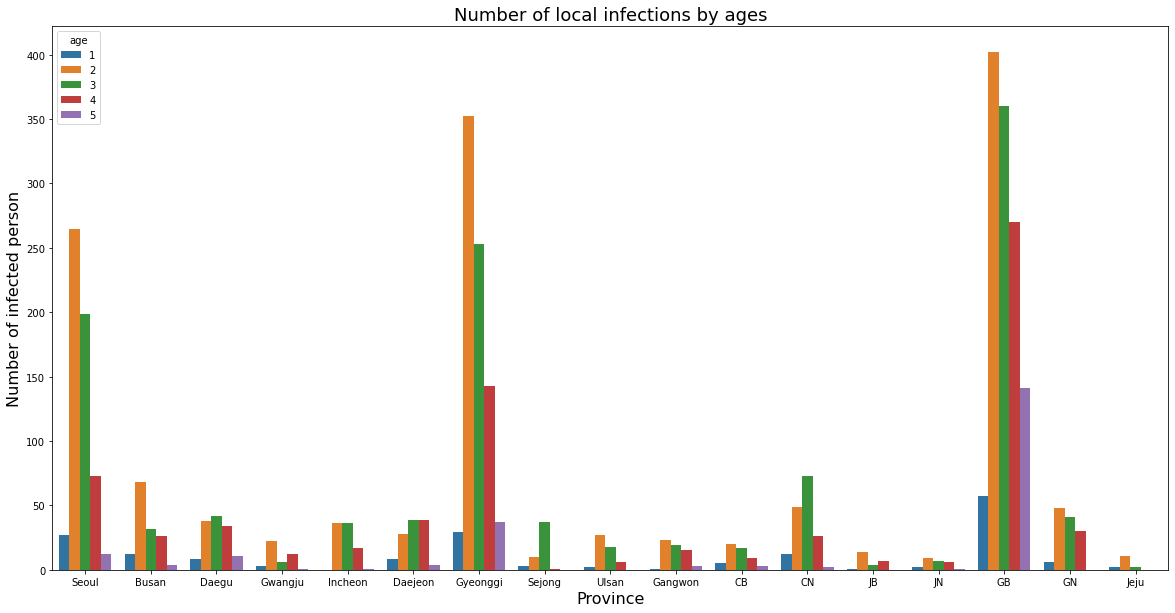

In [67]:
#column 그래프 그리기(필수)
plt.figure(figsize=(20, 10))                                                                   # 그래프 크기
patient_prov_age = sns.countplot('province', data=e, hue='age', hue_order = [1,2,3,4,5])  # 그래프 함수 : sns.countplot() 사용 , 
                                                      # hue : 칼럼명 기준으로 데이터 구분해줌 # palette : 색설정 / hue_order = [원하는값]
# column 그래프 부가 설명(옵션)
patient_prov_age.set_title('Number of local infections by ages', fontsize=18)   # 제목
patient_prov_age.set_xlabel('Province', fontdict={'size':16})                   # x축 이름
patient_prov_age.set_ylabel('Number of infected person', fontdict={'size':16})        # y축 이름
plt.show()

In [ ]:
 column 그래프 그리기(필수)
plt.figure(figsize=(30, 7))                                                                   # 그래프 크기
patient_prov_age = sns.countplot('Province', data=patient_ac_clear, hue='age', palette={'F':'y', 'M':'b'})  # 그래프 함수 : sns.countplot() 사용
                                                      # hue : 칼럼명 기준으로 데이터 구분해줌 # palette : 색설정 
# column 그래프 부가 설명(옵션)
patient_prov_age.set_title('Number of runner by State, Gender - USA', fontsize=18)   # 제목
patient_prov_age.set_xlabel('State', fontdict={'size':16})                   # x축 이름
patient_prov_age.set_ylabel('Number of runner', fontdict={'size':16})        # y축 이름
plt.show()

In [9]:
patient_ac_clear.iloc[0,0]
    

'50s'

In [10]:
patient_ac_clear.iloc[0,1]

'Seoul'

In [11]:
patient_ac_clear.iloc[3784,1]

'Jeju-do'

In [12]:
patient_seoul = patient_ac_clear.groupby('province').get_group('Seoul') # province 그룹에서 Seoul  을 뽑아라
patient_busan = patient_ac_clear.groupby('province').get_group('Busan')
patient_daegu = patient_ac_clear.groupby('province').get_group('Daegu')
patient_daejeon = patient_ac_clear.groupby('province').get_group('Daejeon')
patient_gwangju = patient_ac_clear.groupby('province').get_group('Gwangju')
patient_gyeonggi_do = patient_ac_clear.groupby('province').get_group('Gyeonggi-do')
patient_incheon = patient_ac_clear.groupby('province').get_group('Incheon')
patient_ulsan = patient_ac_clear.groupby('province').get_group('Ulsan')
patient_jeju_do = patient_ac_clear.groupby('province').get_group('Jeju-do')
patient_sejong = patient_ac_clear.groupby('province').get_group('Sejong')



In [13]:
patient_seoul_1 = len(patient_seoul.groupby('age').get_group('20s'))+len(patient_seoul.groupby('age').get_group('30s')) # 20s,30s 명수
patient_seoul_2 = len(patient_seoul.groupby('age').get_group('40s'))+len(patient_seoul.groupby('age').get_group('50s'))
patient_seoul_3 = len(patient_seoul.groupby('age').get_group('60s'))+len(patient_seoul.groupby('age').get_group('70s'))

patient_seoul_f = [patient_seoul_1, patient_seoul_2, patient_seoul_3]
patient_seoul_f

[265, 199, 73]

In [14]:
patient_busan_1 = len(patient_busan.groupby('age').get_group('20s'))+len(patient_busan.groupby('age').get_group('30s')) # 20s,30s 명수
patient_busan_2 = len(patient_busan.groupby('age').get_group('40s'))+len(patient_busan.groupby('age').get_group('50s'))
patient_busan_3 = len(patient_busan.groupby('age').get_group('60s'))+len(patient_busan.groupby('age').get_group('70s'))
patient_busan_f = [patient_busan_1, patient_busan_2, patient_busan_3]

patient_daegu_1 = len(patient_daegu.groupby('age').get_group('20s'))+len(patient_daegu.groupby('age').get_group('30s')) # 20s,30s 명수
patient_daegu_2 = len(patient_daegu.groupby('age').get_group('40s'))+len(patient_daegu.groupby('age').get_group('50s'))
patient_daegu_3 = len(patient_daegu.groupby('age').get_group('60s'))+len(patient_daegu.groupby('age').get_group('70s'))
patient_daegu_f = [patient_daegu_1, patient_daegu_2, patient_daegu_3]

In [15]:
patient_daejeon_1 = len(patient_daejeon.groupby('age').get_group('20s'))+len(patient_daejeon.groupby('age').get_group('30s')) # 20s,30s 명수
patient_daejeon_2 = len(patient_daejeon.groupby('age').get_group('40s'))+len(patient_daejeon.groupby('age').get_group('50s'))
patient_daejeon_3 = len(patient_daejeon.groupby('age').get_group('60s'))+len(patient_daejeon.groupby('age').get_group('70s'))
patient_daejeon_f = [patient_daejeon_1, patient_daejeon_2, patient_daejeon_3]

patient_gwangju_1 = len(patient_gwangju.groupby('age').get_group('20s'))+len(patient_gwangju.groupby('age').get_group('30s')) # 20s,30s 명수
patient_gwangju_2 = len(patient_gwangju.groupby('age').get_group('40s'))+len(patient_gwangju.groupby('age').get_group('50s'))
patient_gwangju_3 = len(patient_gwangju.groupby('age').get_group('60s'))+len(patient_gwangju.groupby('age').get_group('70s'))
patient_gwangju_f = [patient_gwangju_1, patient_gwangju_2, patient_gwangju_3]

patient_gyeonggi_do_1 = len(patient_gyeonggi_do.groupby('age').get_group('20s'))+len(patient_gyeonggi_do.groupby('age').get_group('30s')) # 20s,30s 명수
patient_gyeonggi_do_2 = len(patient_gyeonggi_do.groupby('age').get_group('40s'))+len(patient_gyeonggi_do.groupby('age').get_group('50s'))
patient_gyeonggi_do_3 = len(patient_gyeonggi_do.groupby('age').get_group('60s'))+len(patient_gyeonggi_do.groupby('age').get_group('70s'))
patient_gyeonggi_do_f = [patient_gyeonggi_do_1, patient_gyeonggi_do_2, patient_gyeonggi_do_3]

In [16]:
patient_incheon_1 = len(patient_incheon.groupby('age').get_group('20s'))+len(patient_incheon.groupby('age').get_group('30s')) # 20s,30s 명수
patient_incheon_2 = len(patient_incheon.groupby('age').get_group('40s'))+len(patient_incheon.groupby('age').get_group('50s'))
patient_incheon_3 = len(patient_incheon.groupby('age').get_group('60s'))+len(patient_incheon.groupby('age').get_group('70s'))
patient_incheon_f = [patient_incheon_1, patient_incheon_2, patient_incheon_3]

patient_ulsan_1 = len(patient_ulsan.groupby('age').get_group('20s'))+len(patient_ulsan.groupby('age').get_group('30s')) # 20s,30s 명수
patient_ulsan_2 = len(patient_ulsan.groupby('age').get_group('40s'))+len(patient_ulsan.groupby('age').get_group('50s'))
patient_ulsan_3 = len(patient_ulsan.groupby('age').get_group('60s'))+len(patient_ulsan.groupby('age').get_group('70s'))
patient_ulsan_f = [patient_ulsan_1, patient_ulsan_2, patient_ulsan_3]

patient_jeju_do_1 = len(patient_jeju_do.groupby('age').get_group('20s'))+len(patient_jeju_do.groupby('age').get_group('30s')) # 20s,30s 명수
patient_jeju_do_2 = len(patient_jeju_do.groupby('age').get_group('40s'))
patient_jeju_do_3 = 0
patient_jeju_do_f = [patient_jeju_do_1, patient_jeju_do_2, patient_jeju_do_3]

In [17]:
patient_sejong_1 = len(patient_sejong.groupby('age').get_group('20s'))+len(patient_sejong.groupby('age').get_group('30s')) # 20s,30s 명수
patient_sejong_2 = len(patient_sejong.groupby('age').get_group('40s'))+len(patient_sejong.groupby('age').get_group('50s'))
patient_sejong_3 = len(patient_sejong.groupby('age').get_group('60s'))
patient_sejong_f = [patient_sejong_1, patient_sejong_2, patient_sejong_3]

In [18]:
patient_prov = [patient_seoul_f,patient_busan_f,patient_daegu_f,patient_daejeon_f,patient_gwangju_f,
                patient_gyeonggi_do_f,patient_incheon_f,patient_jeju_do_f,patient_sejong_f,patient_ulsan_f]
patient_prov

[[265, 199, 73],
 [68, 32, 26],
 [38, 42, 34],
 [28, 39, 39],
 [22, 6, 12],
 [352, 253, 143],
 [36, 36, 17],
 [11, 2, 0],
 [10, 37, 1],
 [27, 18, 6]]

In [19]:
prov = ['Seoul','Busan','Daegu','Daejeon','Gwangju','Gyeonggi-do','Incheon','Jeju-do','Sejong','Ulsan']
ages = ['20s,30s','30s,40s','50s,60s']
ages

['20s,30s', '30s,40s', '50s,60s']

In [20]:
prov_df = pd.DataFrame(prov)
prov_df.columns = ['prov'] # 칼럼명 지정
prov_df = prov_df.transpose()
prov_df

,0,1,2,3,4,5,6,7,8,9
prov,Seoul,Busan,Daegu,Daejeon,Gwangju,Gyeonggi-do,Incheon,Jeju-do,Sejong,Ulsan


In [21]:
patient_prov_df = pd.DataFrame(patient_prov, columns = ages)
patient_prov_df_1 = patient_prov_df.transpose()# 행과 열을 바꾸기

patient_prov_df_2 = patient_prov_df_1.append(prov_df)
#patient_prov_df['Province'] = prov
patient_prov_df_2

,0,1,2,3,4,5,6,7,8,9
"20s,30s",265,68,38,28,22,352,36,11,10,27
"30s,40s",199,32,42,39,6,253,36,2,37,18
"50s,60s",73,26,34,39,12,143,17,0,1,6
prov,Seoul,Busan,Daegu,Daejeon,Gwangju,Gyeonggi-do,Incheon,Jeju-do,Sejong,Ulsan


# 시각화

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns           # 시각화 라이브러리

from tqdm import tqdm_notebook # for문 진행상황 게이지로 알려줌

# 파이썬 warning 무시
import warnings
warnings.filterwarnings(action='ignore') 
import selenium

In [83]:
# column 그래프 그리기(필수)
plt.figure(figsize=(20, 7))                                                                   # 그래프 크기
patient_prov_ages = sns.countplot('prov', data=patient_prov_df, hue = ages)  # 그래프 함수 : sns.countplot() 사용
                                                      # hue : 칼럼명 기준으로 데이터 구분해줌
# column 그래프 부가 설명(옵션)
patient_prov_ages.set_title('Province and Ages', fontsize=18)   # 제목
patient_prov_ages.set_xlabel('Province', fontdict={'size':16})                   # x축 이름
patient_prov_ages.set_ylabel('Ages', fontdict={'size':16})        # y축 이름
plt.show()

ValueError: Could not interpret input 'prov'

<Figure size 1440x504 with 0 Axes>

In [38]:
patient_age_df = patient_age.to_frame() # to_frame() : 시리즈를 데이터프레임으로 만들기

In [40]:
patient_age_df

0       50s
1       30s
2       50s
3       20s
4       20s
       ... 
5156    30s
5157    20s
5158    10s
5159    30s
5160    30s
Name: age, Length: 3785, dtype: object

In [34]:
type(patient_age)

pandas.core.series.Series

In [43]:
patient_age[1]

'30s'

In [ ]:
a = []
b = []
c = []



for i in range(0,len(patient_age)):
    if patient_age[i] == '20s' or '30s':
        a.append()
        


In [19]:
len(patient_age)

3785